IMPORTING THE REQUIRED LIBRARIES

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

LOAD THE DATASET

In [5]:
df=pd.read_csv("milknew.csv")

PREPROCESSING OF DATA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [7]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [8]:
df.shape

(1059, 8)

In [9]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

CHECK FOR MISSING VALUES

In [10]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

CHECKING FOR SKEWNESS

In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


pH           -0.683904
Temprature    2.216739
Taste        -0.188058
Odor          0.272949
Fat          -0.730799
Turbidity     0.035940
Colour       -1.024902
dtype: float64

In [11]:
quantile1=df["Temprature"].quantile(0.25)
quantile2=df["Temprature"].quantile(0.75)

In [11]:
df["Temprature"]=np.where(df["Temprature"]<quantile1,quantile1,df["Temprature"])
df["Temprature"]=np.where(df["Temprature"]>quantile2,quantile2,df["Temprature"])

In [ ]:
quantile1=df["Colour"].quantile(0.25)
quantile2=df["Colour"].quantile(0.75)

df["Colour"]=np.where(df["Colour"]<quantile1,quantile1,df["Colour"])
df["Colour"]=np.where(df["Colour"]>quantile2,quantile2,df["Colour"])

In [ ]:
quantile1=df["pH"].quantile(0.25)
quantile2=df["pH"].quantile(0.75)

df["pH"]=np.where(df["pH"]<quantile1,quantile1,df["pH"])
df["pH"]=np.where(df["pH"]>quantile2,quantile2,df["pH"])

MULTIVARIATE ANALYSIS

Text(0.5, 1.0, 'Grade v/s Color')

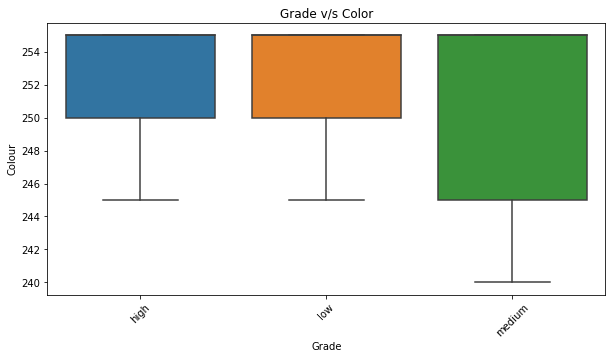

In [12]:
plt.figure(figsize=(10,5))
sx=sns.boxplot(x='Grade',y='Colour',=df)
plt.xticks(rotation=45)
plt.title('Grade v/s Color')

Text(0.5, 1.0, 'Grade v/s Turbidity')

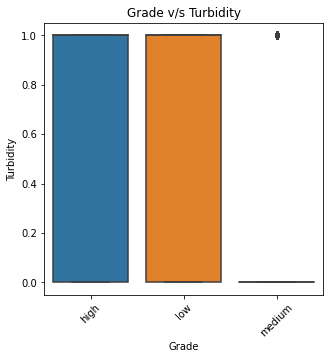

In [13]:
plt.figure(figsize=(5,5))
sx=sns.boxplot(x='Grade',y='Turbidity',data=df)
plt.xticks(rotation=45)
plt.title('Grade v/s Turbidity')

Text(0.5, 1.0, 'Grade v/s Fat')

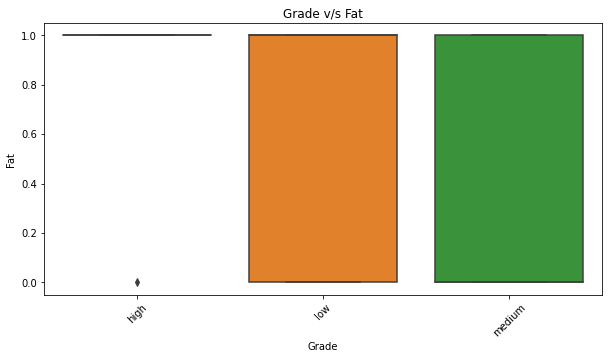

In [14]:
plt.figure(figsize = (10,5))
sx = sns.boxplot(x='Grade', y='Fat ', data=df)
plt.xticks(rotation=45)
plt.title('Grade v/s Fat')

Text(0.5, 1.0, 'Grade v/s Odor')

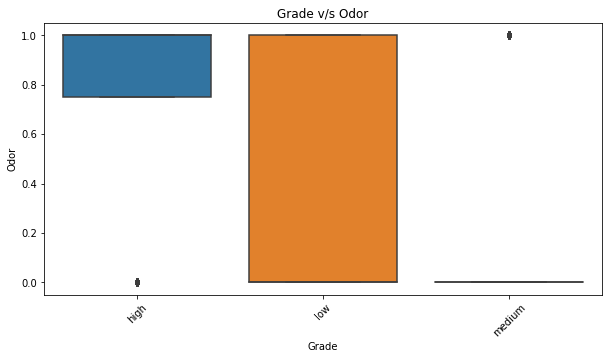

In [15]:
plt.figure(figsize = (10, 5))
ax = sns.boxplot(x='Grade', y='Odor', data=df)
plt.xticks(rotation=45)
plt.title('Grade v/s Odor')

Text(0.5, 1.0, 'Grade v/s pH')

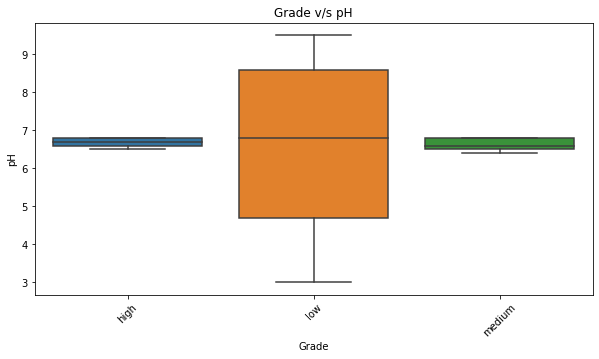

In [16]:
plt.figure(figsize = (10,5))
ax = sns.boxplot(x='Grade', y='pH', data=df)
plt.xticks(rotation=45)
plt.title('Grade v/s pH')

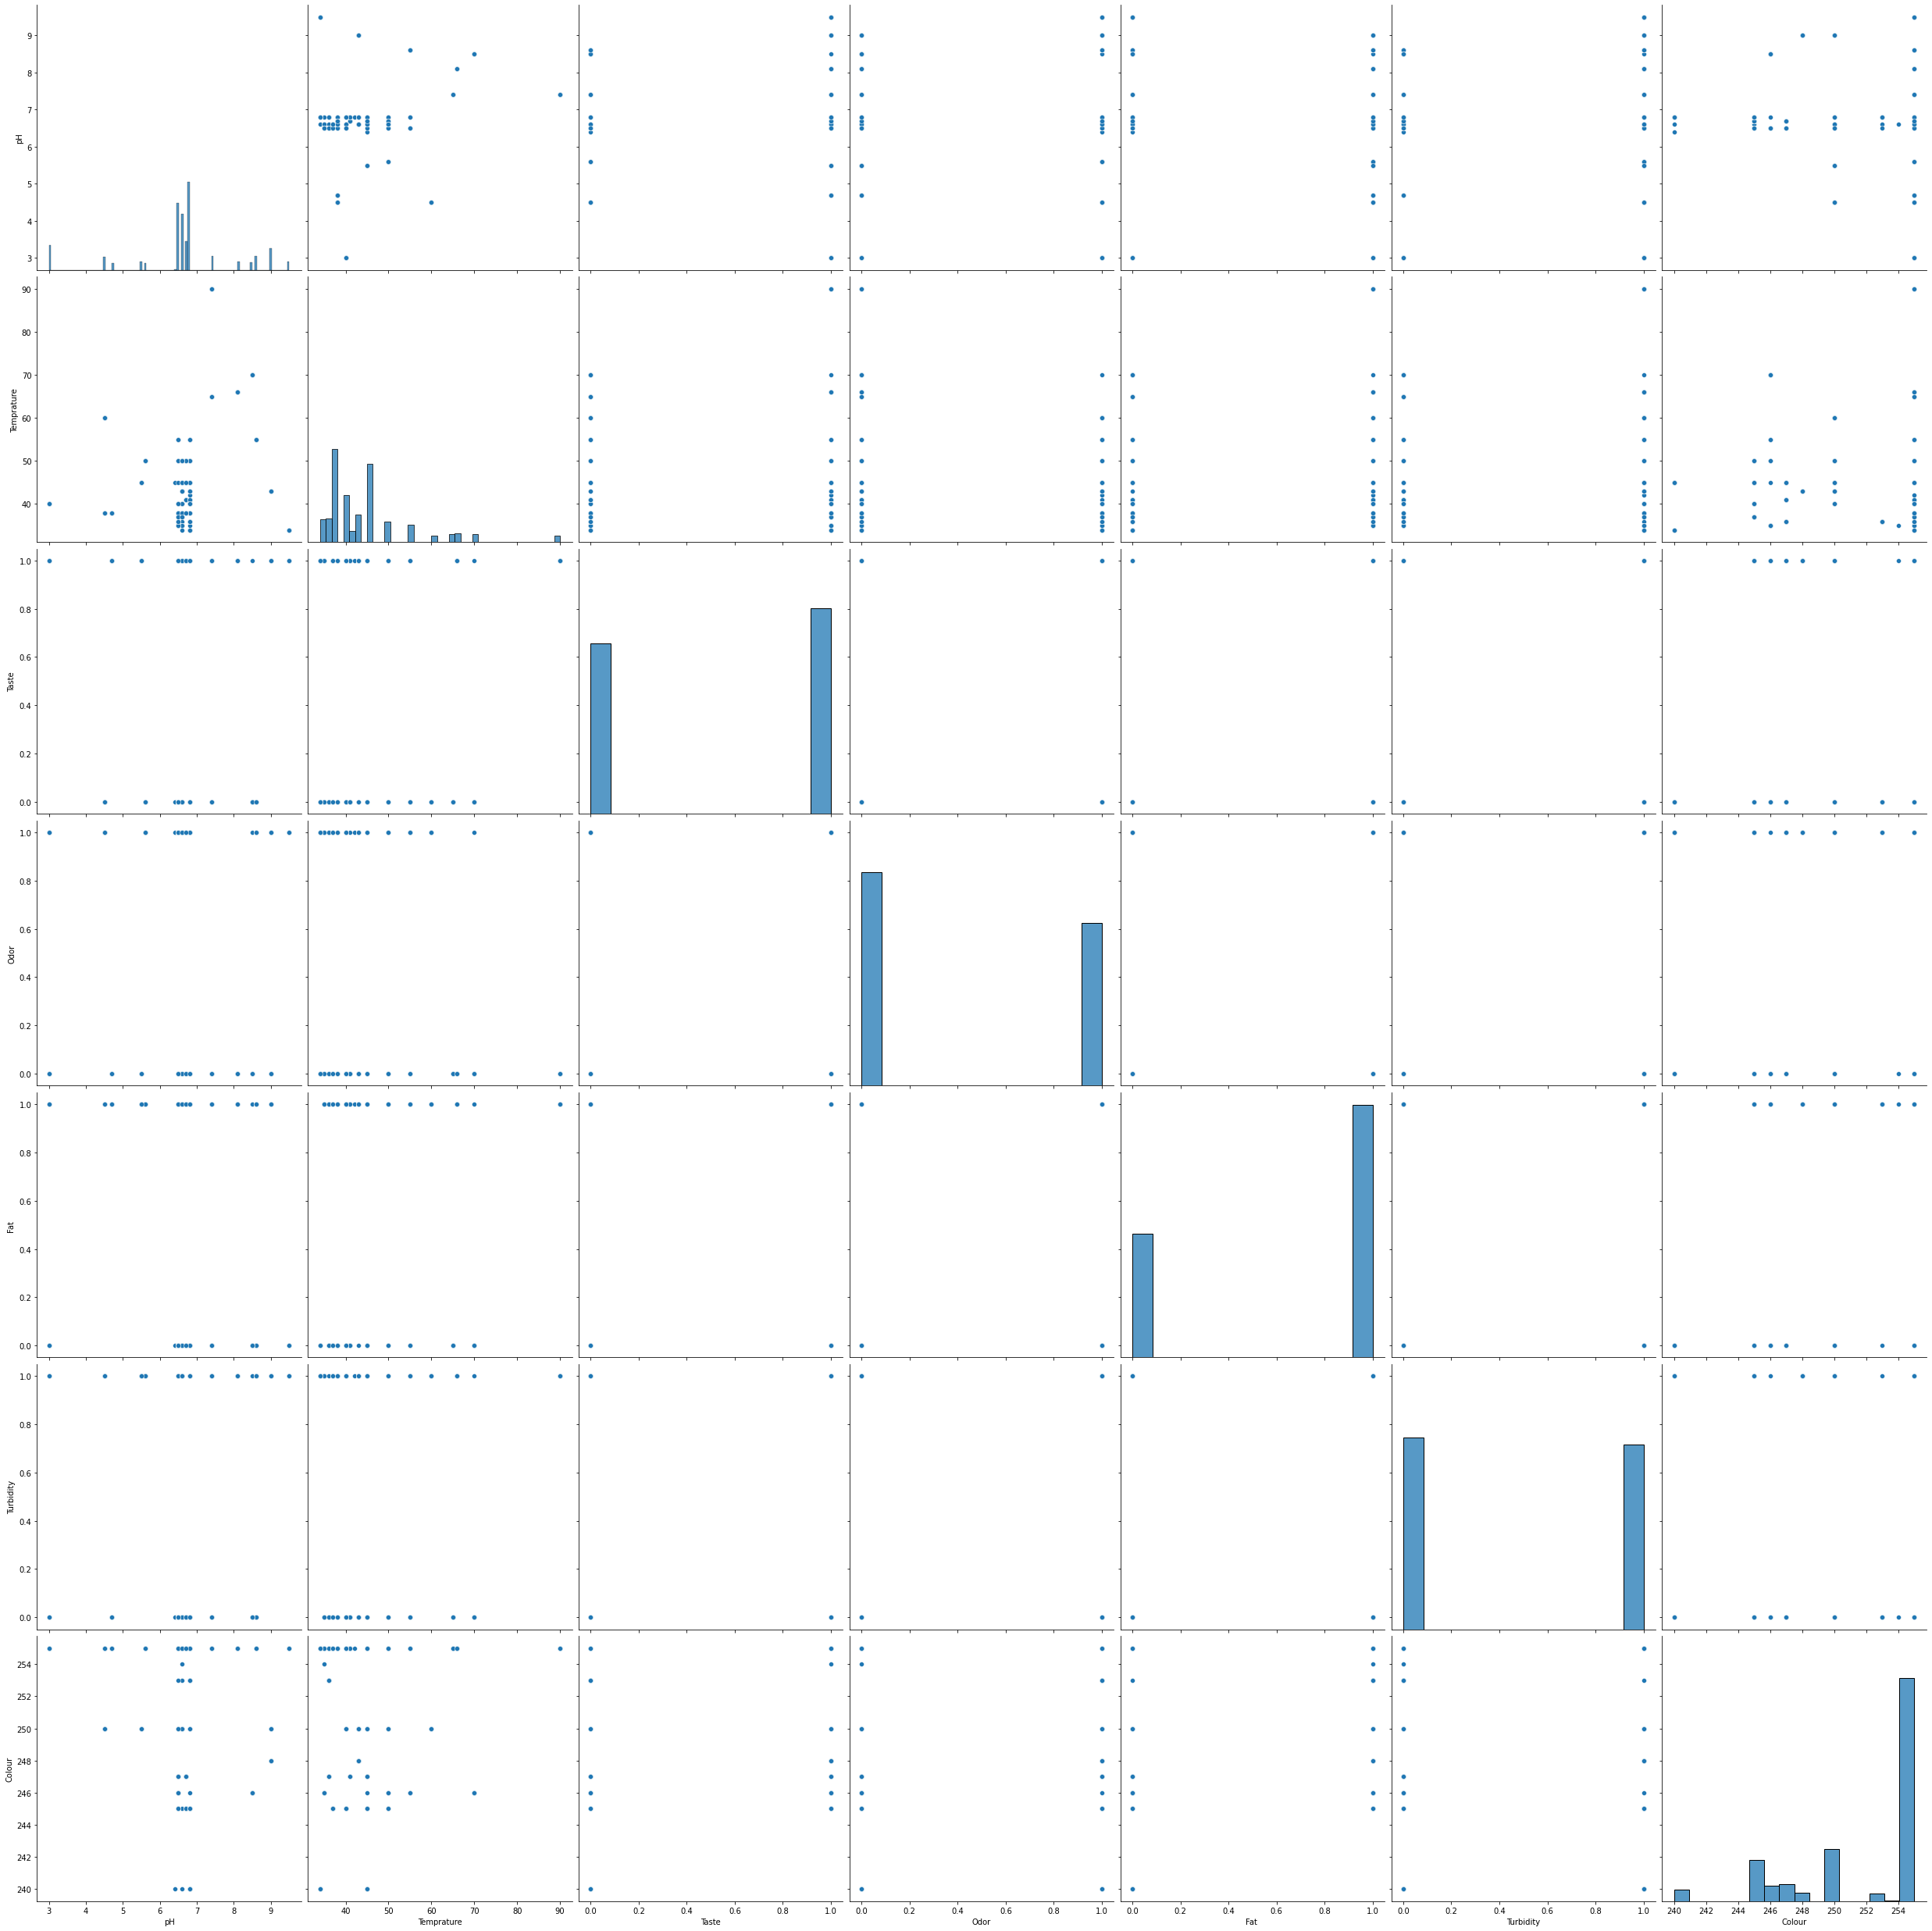

In [17]:
sns.pairplot(df,height=5)

CORRELAION

In [18]:
correlation=df.corr()

In [19]:
correlation

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,-0.064053,-0.081331,-0.093429,0.048384,-0.164565
Temprature,0.244684,1.000000,-0.109792,-0.048870,0.024073,0.185106,-0.008511
Taste,-0.064053,-0.109792,1.000000,0.017582,0.324149,0.055755,-0.082654
Odor,-0.081331,-0.048870,0.017582,1.000000,0.314505,0.457935,-0.039361
Fat,-0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,-0.164565,-0.008511,-0.082654,-0.039361,0.114151,0.136436,1.000000


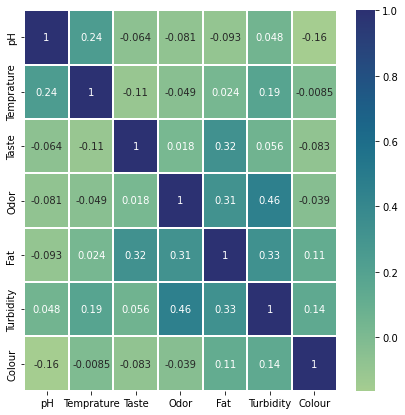

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

MODEL

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Grade']= label_encoder.fit_transform(df['Grade'])
df['Grade'].unique()

array([0, 1, 2])

In [23]:
from sklearn.model_selection import train_test_split
X=df.drop(['Grade'],axis=1)
y=df['Grade']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pred=model.predict(X_test)
y_pred.shape

(318,)

In [26]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.9968553459119497

KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)

In [29]:
accuracy_knn=knn.score(X_test,y_test)
print(accuracy_knn)

0.9937106918238994


In [31]:
from sklearn.metrics import confusion_matrix
knn_prediction=knn.predict(X_test)
conf_matrix=confusion_matrix(y_test,knn_prediction)
print(conf_matrix)

[[ 78   0   0]
 [  0 125   1]
 [  1   0 113]]
